In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scraping import Dbase
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
data = Dbase()
df1 = data.imdb_requests()

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   titles         250 non-null    object 
 1   genre1         250 non-null    object 
 2   genre2         250 non-null    object 
 3   genre3         250 non-null    object 
 4   nb_genres      250 non-null    int64  
 5   released_year  250 non-null    int64  
 6   director1      250 non-null    object 
 7   director2      250 non-null    object 
 8   director3      250 non-null    object 
 9   nb_directors   250 non-null    int64  
 10  grade          250 non-null    float64
 11  votes          250 non-null    int64  
 12  gross(M$)      250 non-null    float64
dtypes: float64(2), int64(4), object(7)
memory usage: 25.5+ KB


# Objectif : Prédiction de la note

In [4]:
#!pip install pandas_profiling


In [5]:
df1

,titles,genre1,genre2,genre3,nb_genres,released_year,director1,director2,director3,nb_directors,grade,votes,gross(M$)
0,Les Évadés,Drama,Drama,Drama,1,1994,Frank Darabont,Frank Darabont,Frank Darabont,1,9.3,2386826,28.34
1,Le parrain,Crime,Drama,Drama,2,1972,Francis Ford Coppola,Francis Ford Coppola,Francis Ford Coppola,1,9.2,1654238,134.97
2,The Dark Knight : Le Chevalier noir,Action,Crime,Drama,3,2008,Christopher Nolan,Christopher Nolan,Christopher Nolan,1,9.0,2349913,534.86
3,"Le parrain, 2ème partie",Crime,Drama,Drama,2,1974,Francis Ford Coppola,Francis Ford Coppola,Francis Ford Coppola,1,9.0,1150703,57.30
4,12 Hommes en colère,Crime,Drama,Drama,2,1957,Sidney Lumet,Sidney Lumet,Sidney Lumet,1,9.0,704576,4.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Mr. Smith au sénat,Comedy,Drama,Drama,2,1939,Frank Capra,Frank Capra,Frank Capra,1,8.1,108523,9.60
246,Autant en emporte le vent,Drama,History,Romance,3,1939,Victor Fleming,George Cukor,Sam Wood,3,8.1,294168,198.68
247,New York - Miami,Comedy,Romance,Romance,2,1934,Frank Capra,Frank Capra,Frank Capra,1,8.1,95816,4.36
248,La passion de Jeanne d'Arc,Biography,Drama,History,3,1928,Carl Theodor Dreyer,Carl Theodor Dreyer,Carl Theodor Dreyer,1,8.1,49029,0.02


## Observation

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df1.sample(n=250))
prof.to_file(output_file='output.html')

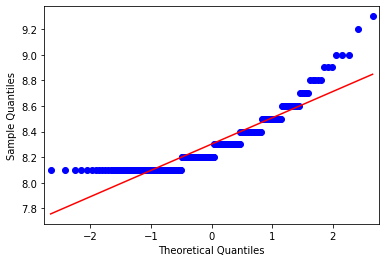

In [7]:
import statsmodels.api as sm

sm.qqplot(df1['grade'], line = 'r')
plt.show()

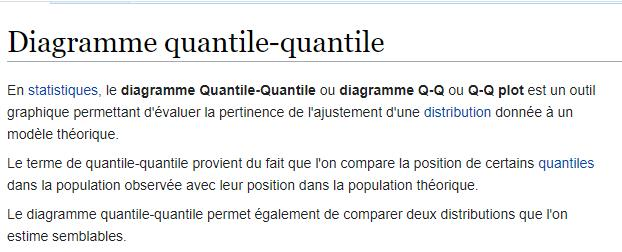

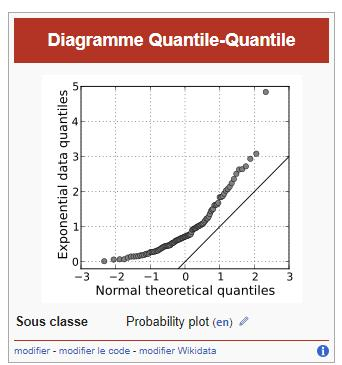

## Numerical variables

In [8]:
df2 = pd.DataFrame()
df2['pearson'] = abs(df1.corr(method = 'pearson'))['grade']

In [9]:
df2['spearman'] = abs(df1.corr(method = 'spearman'))['grade']

In [10]:
df2['kendall'] = abs(df1.corr(method = 'kendall'))['grade']

In [11]:
df2

,pearson,spearman,kendall
nb_genres,0.087858,0.052780,0.044888
released_year,0.003465,0.044531,0.032057
nb_directors,0.055489,0.046807,0.041310
grade,1.000000,1.000000,1.000000
votes,0.613416,0.404643,0.300059
gross(M$),0.200434,0.126698,0.091648


* **Par rapport au model prédictif, Seul 'votes' bénéficie d'une corrélation intéressante**

## Categorial variables

In [12]:
df_cat = df1[['genre1','director1']]
df_cat
        

,genre1,director1
0,Drama,Frank Darabont
1,Crime,Francis Ford Coppola
2,Action,Christopher Nolan
3,Crime,Francis Ford Coppola
4,Crime,Sidney Lumet
...,...,...
245,Comedy,Frank Capra
246,Drama,Victor Fleming
247,Comedy,Frank Capra
248,Biography,Carl Theodor Dreyer


In [13]:
#df_cat2 = pd.DataFrame(df1, columns = ['genre1', 'director1'])
#df_cat2

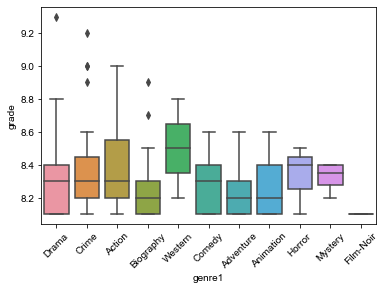

In [14]:
from matplotlib.pyplot import figure
ax = sns.boxplot(x="genre1", y="grade", data=df1)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(30, 10)})

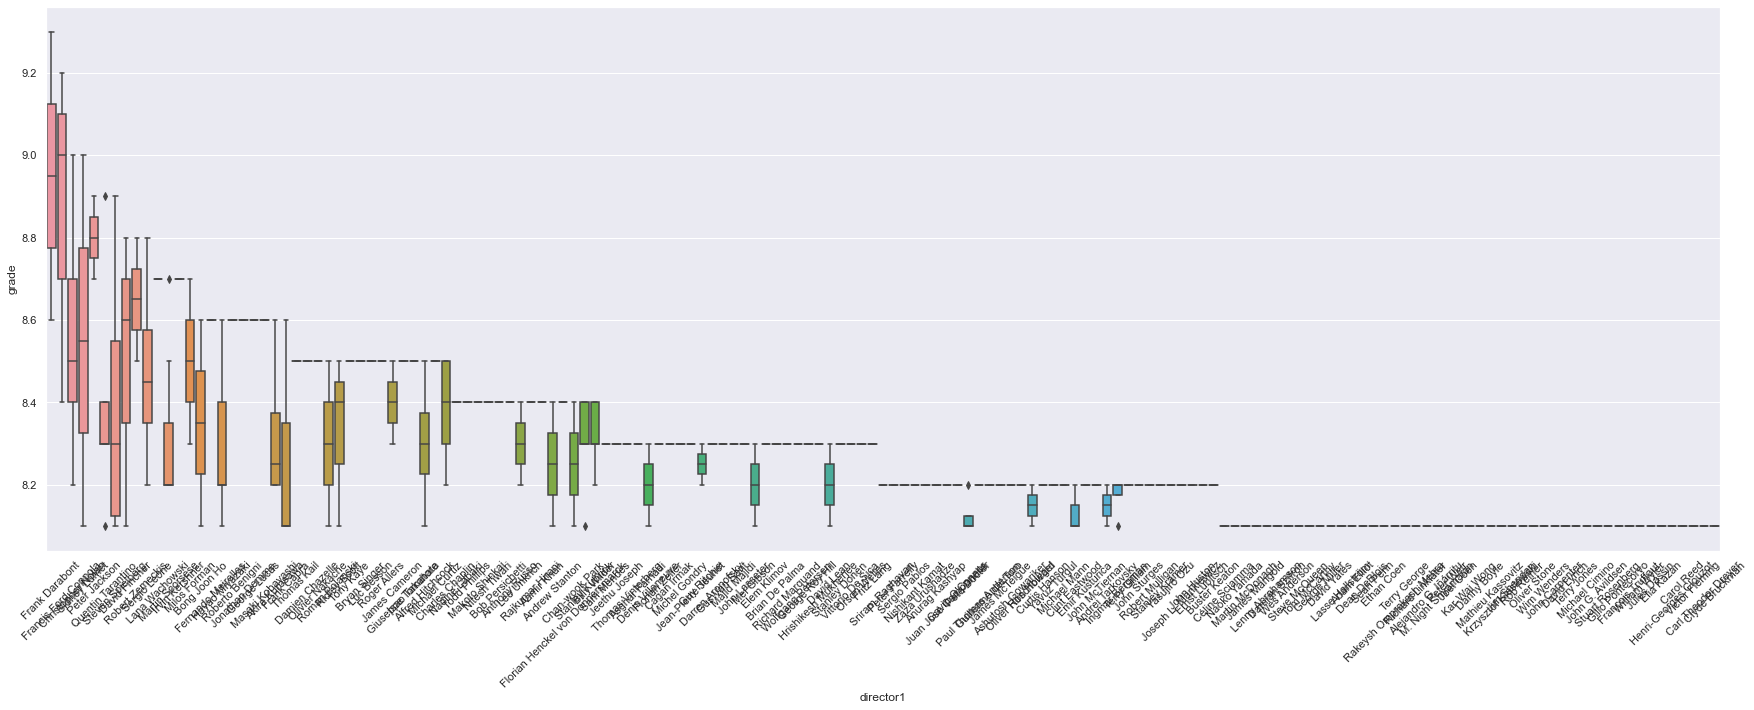

In [15]:
from matplotlib.pyplot import figure
ax = sns.boxplot(x="director1", y="grade", data=df1)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(30, 10)})

In [16]:
df1['director1'].value_counts()

Stanley Kubrick      7
Martin Scorsese      7
Christopher Nolan    7
Akira Kurosawa       6
Alfred Hitchcock     6
                    ..
Damien Chazelle      1
Terry Gilliam        1
Luc Besson           1
Dean DeBlois         1
Jeethu Joseph        1
Name: director1, Length: 157, dtype: int64

In [17]:
df1['director1'].nunique()

157

In [18]:
df4 = df1.head(25)

<AxesSubplot:xlabel='director1', ylabel='grade'>

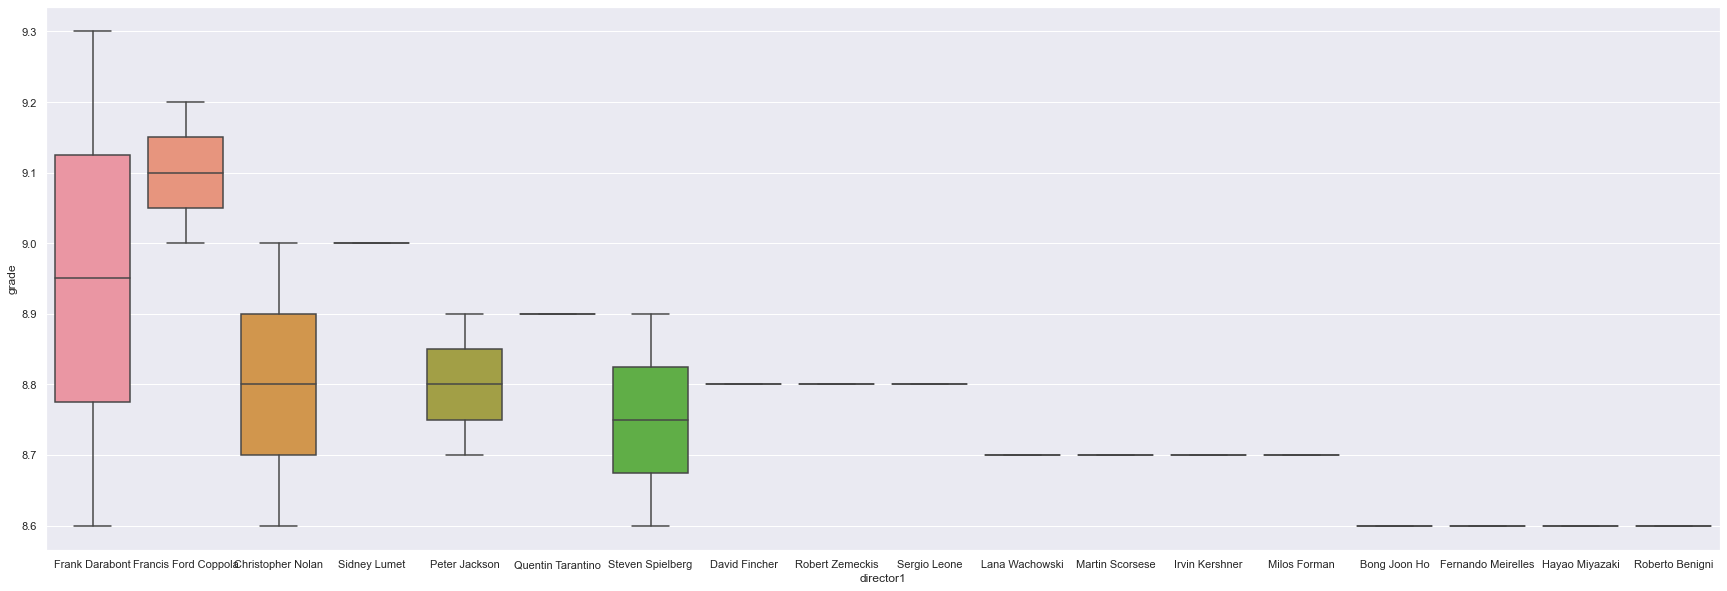

In [19]:
sns.boxplot(x="director1", y="grade", data=df4)

In [20]:
df1[df1['director1']=='Frank Darabont']

,titles,genre1,genre2,genre3,nb_genres,released_year,director1,director2,director3,nb_directors,grade,votes,gross(M$)
0,Les Évadés,Drama,Drama,Drama,1,1994,Frank Darabont,Frank Darabont,Frank Darabont,1,9.3,2386826,28.34
23,La ligne verte,Crime,Drama,Fantasy,3,1999,Frank Darabont,Frank Darabont,Frank Darabont,1,8.6,1170879,136.80


In [21]:
df5 = df1[:100].copy()


In [22]:
df6 = pd.get_dummies(data=df5, columns=['director1','genre1'])

In [23]:
df6

,titles,genre2,genre3,nb_genres,released_year,director2,director3,nb_directors,grade,votes,...,genre1_Action,genre1_Adventure,genre1_Animation,genre1_Biography,genre1_Comedy,genre1_Crime,genre1_Drama,genre1_Horror,genre1_Mystery,genre1_Western
0,Les Évadés,Drama,Drama,1,1994,Frank Darabont,Frank Darabont,1,9.3,2386826,...,0,0,0,0,0,0,1,0,0,0
1,Le parrain,Drama,Drama,2,1972,Francis Ford Coppola,Francis Ford Coppola,1,9.2,1654238,...,0,0,0,0,0,1,0,0,0,0
2,The Dark Knight : Le Chevalier noir,Crime,Drama,3,2008,Christopher Nolan,Christopher Nolan,1,9.0,2349913,...,1,0,0,0,0,0,0,0,0,0
3,"Le parrain, 2ème partie",Drama,Drama,2,1974,Francis Ford Coppola,Francis Ford Coppola,1,9.0,1150703,...,0,0,0,0,0,1,0,0,0,0
4,12 Hommes en colère,Drama,Drama,2,1957,Sidney Lumet,Sidney Lumet,1,9.0,704576,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Toy Story,Adventure,Comedy,3,1995,John Lasseter,John Lasseter,1,8.3,902813,...,0,0,1,0,0,0,0,0,0,0
96,Braveheart,Drama,History,3,1995,Mel Gibson,Mel Gibson,1,8.3,971574,...,0,0,0,1,0,0,0,0,0,0
97,Reservoir Dogs,Drama,Thriller,3,1992,Quentin Tarantino,Quentin Tarantino,1,8.3,933870,...,0,0,0,0,0,1,0,0,0,0
98,Full Metal Jacket,War,War,2,1987,Stanley Kubrick,Stanley Kubrick,1,8.3,685133,...,0,0,0,0,0,0,1,0,0,0


In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
scaler = MinMaxScaler()
keepCols = ['votes']
scaled_df = scaler.fit_transform(df6[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)

scaled_df

,votes
0,1.000000
1,0.688504
2,0.984305
3,0.474401
4,0.284708
...,...
95,0.368999
96,0.398236
97,0.382204
98,0.276441


In [25]:
df6['votes'] = scaled_df

# NECESSITE DE SCALER LES DONNES NUMERIQUES

In [26]:
#importer les données Advertising.csv
list_var = df6.drop(['titles','genre2','genre3','nb_genres','released_year','director2','director3','nb_directors','grade','gross(M$)'],axis = 1)
list_var                    
                     
                     

,votes,director1_Aamir Khan,director1_Akira Kurosawa,director1_Alfred Hitchcock,director1_Andrew Stanton,director1_Anthony Russo,director1_Asghar Farhadi,director1_Billy Wilder,director1_Bob Persichetti,director1_Bong Joon Ho,...,genre1_Action,genre1_Adventure,genre1_Animation,genre1_Biography,genre1_Comedy,genre1_Crime,genre1_Drama,genre1_Horror,genre1_Mystery,genre1_Western
0,1.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.688504,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.984305,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.474401,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.284708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.368999,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
96,0.398236,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
97,0.382204,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
98,0.276441,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
from sklearn.linear_model import LinearRegression

#créer un objet reg lin
modeleReg=LinearRegression()

y=df6['grade']
X=list_var

modeleReg.fit(X,y)

LinearRegression()

In [28]:
print(f'La constante est égale à : {modeleReg.intercept_}')
print(f'Les coefficients directeurs sont respectivement de : {modeleReg.coef_}')

#calcul du R²
Rcarre = modeleReg.score(X,y)
print(f'le R² est de : {Rcarre}')

RMSE=np.sqrt(((y-modeleReg.predict(X))**2).sum()/len(y))
print(f'La RMSE est de : {RMSE}')

La constante est égale à : 8.180645665176737
Les coefficients directeurs sont respectivement de : [ 1.22214896  0.24065132  0.315287    0.0249979  -0.25645325 -0.07559438
  0.11414777  0.20294847  0.06558492  0.11340279 -0.18308529  0.10352124
  0.18898003 -0.29461049  0.04822632 -0.17380713 -0.28824197  0.15042607
  0.19846783  0.07145445  0.14135475  0.20346329  0.14405465  0.3168867
 -0.08916731 -0.07228012  0.30830995 -0.22527604 -0.28595926  0.10695644
  0.06517572  0.24618735 -0.04768093 -0.24414766  0.12137481 -0.29709959
 -0.23366993 -0.21022324  0.06245347 -0.07109096  0.19596984  0.16435923
 -0.26555827  0.55342271 -0.60586089  0.15563578 -0.25003197  0.14666249
  0.29542316  0.29251475 -0.30457144 -0.06669591 -0.34821412  0.04299328
 -0.21193677 -0.17417491  0.09594855 -0.12650594 -0.28904876 -0.16947969
  0.07454885  0.47341875 -0.01113783 -0.11825467  0.06590551  0.07954642
 -0.27604966 -0.11368995  0.18893576 -0.13914178 -0.10362365 -0.03451737
  0.2385118   0.01135543 -0

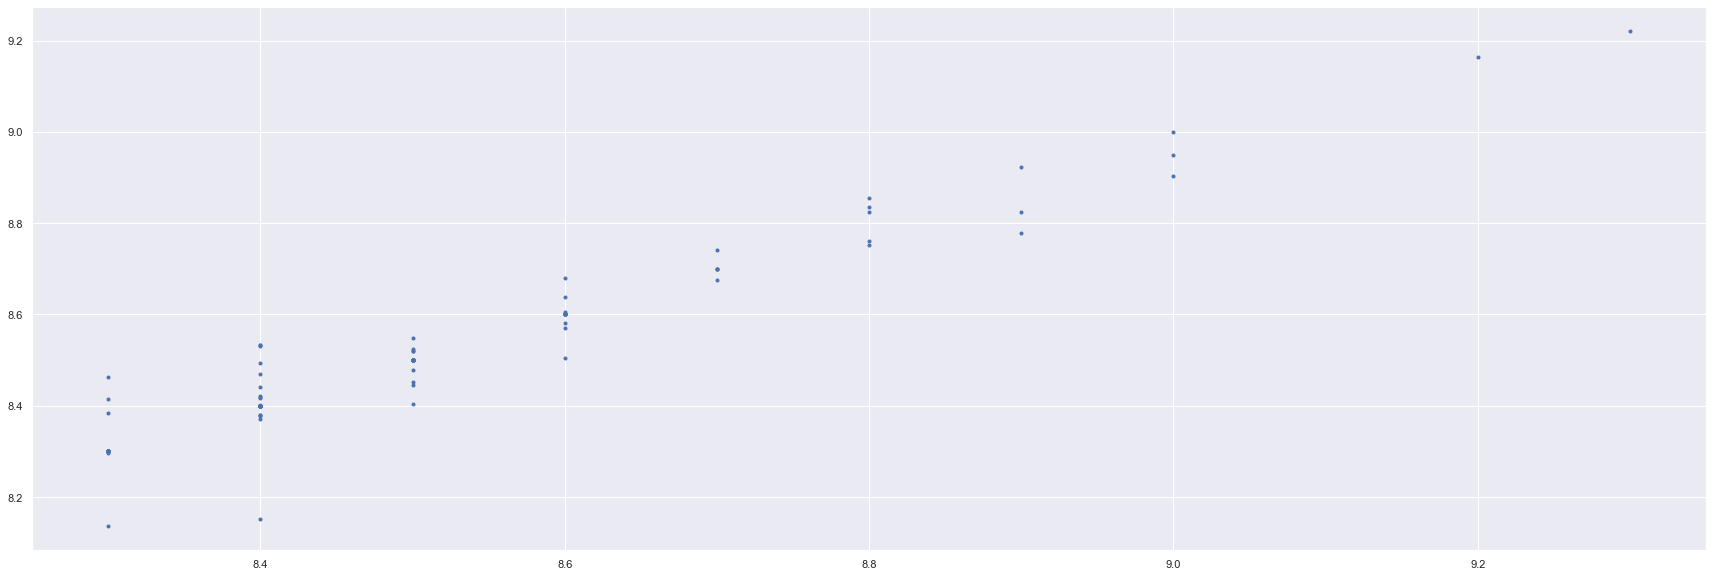

In [29]:
plt.plot(y, modeleReg.predict(X),'.')
plt.show()

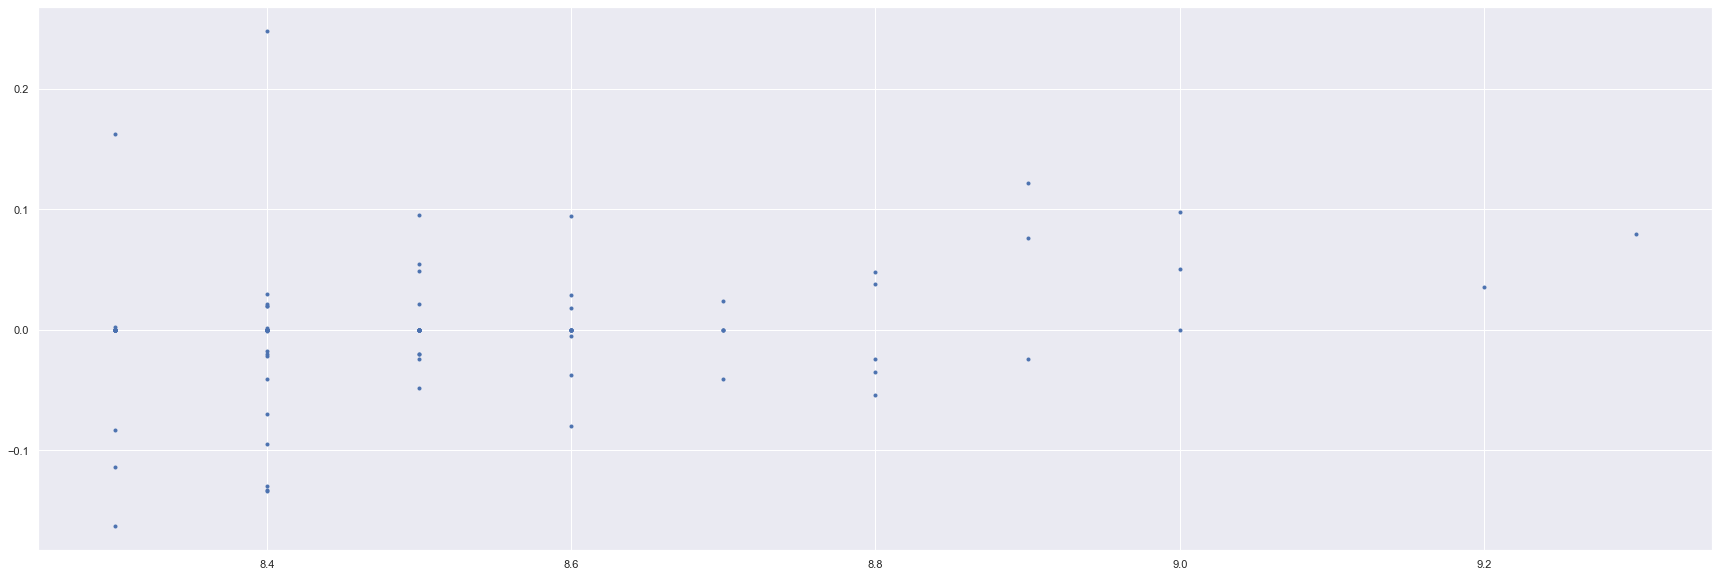

In [30]:
plt.plot(y, y-modeleReg.predict(X),'.')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
def prepare_machine(df):
    df = pd.get_dummies(data=df, columns=['director1', 'genre1'])
    scaler = MinMaxScaler()
    keepCols = ['votes']
    scaled_df = scaler.fit_transform(df[keepCols])
    scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
    df['votes'] = scaled_df
    df = df.drop(['genre2', 'genre3', 'nb_genres', 'released_year',
                  'director2', 'director3', 'nb_directors', 'gross(M$)'], axis=1)
    return df

In [33]:
def create_model(df):
    df = prepare_machine(df)
    df = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)
    
    cut = round(len(df)*0.995)
    train = df
    #train = df.iloc[:cut,:]
    #test = df[50:59]
    test = df.iloc[cut:,:]
    
    y = train['grade']
    X = train.drop(['titles','grade'],axis = 1)
      
    model=LinearRegression()
    model.fit(X,y)
    Rcarre = model.score(X,y)
    
    y = test['grade']
    nom = test['titles'].iloc[0]
    X = test.drop(['titles','grade'],axis = 1)
      
    prediction = model.predict(X)
    
    #RMSE=np.sqrt(((y-prediction)**2).sum()/len(y))
    rmse = mean_squared_error(prediction,y)**(1/2)
    return print(f"""
    Pour le film : {nom}, valeur attendue : {y.iloc[0]}, la prédiction est de {round(prediction[0],1)}
    R2 = {Rcarre}
    rmse = {rmse}
    """)

In [34]:
create_model(df1)


    Pour le film : Inglourious Basterds, valeur attendue : 8.3, la prédiction est de 8.4
    R2 = 0.8401325896576097
    rmse = 0.06618614196777273
    


In [35]:
list(df1['director1'].value_counts().index)
list(df1['genre1'].value_counts().index)

['Drama',
 'Action',
 'Crime',
 'Comedy',
 'Animation',
 'Biography',
 'Adventure',
 'Mystery',
 'Western',
 'Horror',
 'Film-Noir']

In [36]:
df1[df1['genre1'] == 'Animation'].head()

,titles,genre1,genre2,genre3,nb_genres,released_year,director1,director2,director3,nb_directors,grade,votes,gross(M$)
21,Le voyage de Chihiro,Animation,Adventure,Family,3,2001,Hayao Miyazaki,Hayao Miyazaki,Hayao Miyazaki,1,8.6,668614,10.0600
41,The Lion King,Animation,Adventure,Drama,3,1994,Roger Allers,Rob Minkoff,Rob Minkoff,2,8.5,959401,422.7800
44,Le tombeau des lucioles,Animation,Drama,War,3,1988,Isao Takahata,Isao Takahata,Isao Takahata,1,8.5,242210,24.0975
53,Your Name.,Animation,Drama,Fantasy,3,2016,Makoto Shinkai,Makoto Shinkai,Makoto Shinkai,1,8.4,207241,5.0200
55,Spider-Man: New Generation,Animation,Action,Adventure,3,2018,Bob Persichetti,Peter Ramsey,Rodney Rothman,3,8.4,397317,190.2400


In [37]:
from ipywidgets import interact
import ipywidgets as widgets

In [38]:
# Interact with specification of arguments
@interact
def affiche(titles='Ajouter_titre',
            director1=list(df1['director1'].value_counts().index),
            genre1=list(df1['genre1'].value_counts().index),
            votes = (0,1,0.1)
            ):
    df = prepare_machine(df1)
    df = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)

    train = df

    test = train[0:1]
    a = test.iloc[:, 3:]
    for i in a:
        test[i] = 0
    test['titles'] = titles
    test['genre1_'+genre1] = 1
    test['director1_'+director1] = 1
    test['votes'] = votes

    y = train['grade']
    X = train.drop(['titles', 'grade'], axis=1)

    model = LinearRegression()
    model.fit(X, y)
    Rcarre = model.score(X, y)
    prediction = model.predict(X)
    rmse = mean_squared_error(prediction, y)**(1/2)
    
    nom = test['titles'].iloc[0]
    X = test.drop(['titles', 'grade'], axis=1)

    prediction = model.predict(X)
    if prediction < 0 or prediction > 10:
        prediction = ['impossible, ça ne sait pas faire ce genre de film']

    return f"""Le film : {nom} aura une note de : {prediction[0]}"""

interactive(children=(Text(value='Ajouter_titre', description='titles'), Dropdown(description='director1', opt…

In [39]:
# Distribution de la variable grade: 

<AxesSubplot:xlabel='grade', ylabel='Count'>

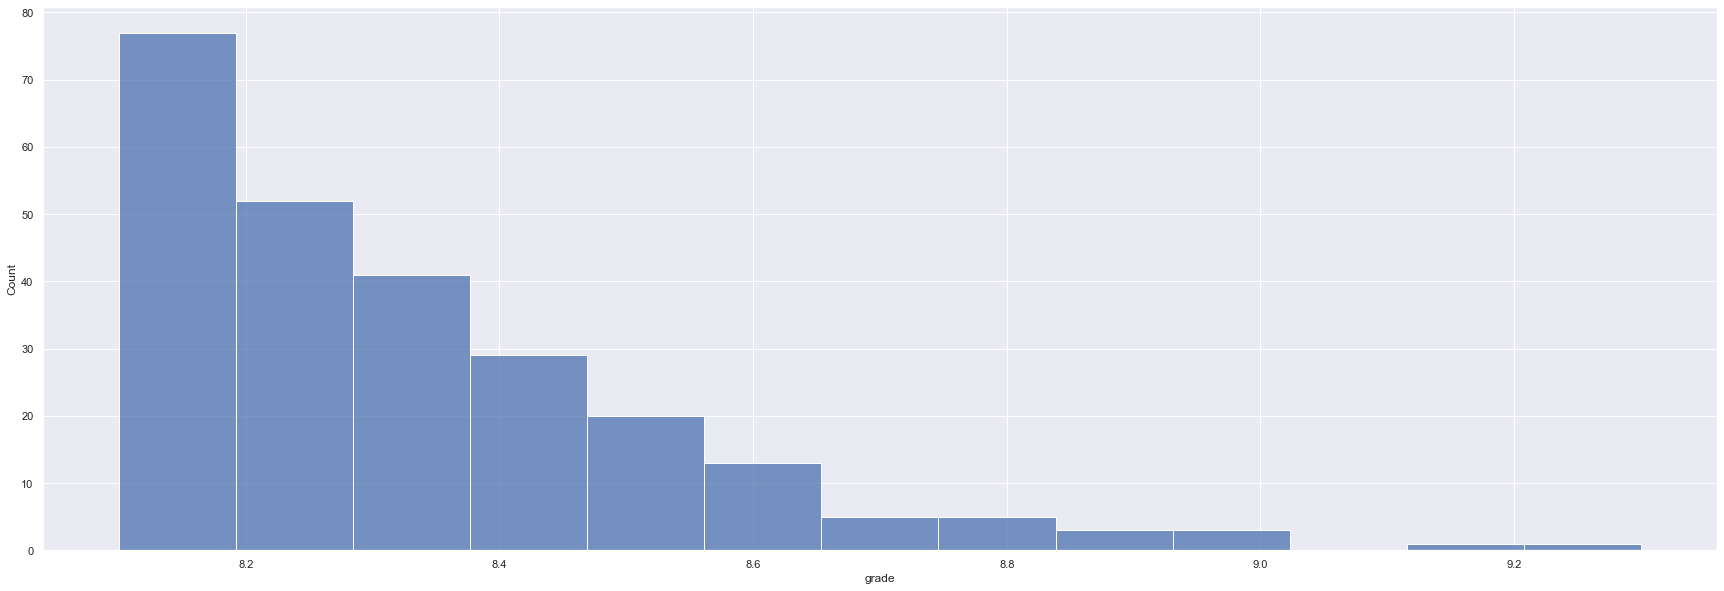

In [40]:
sns.histplot(x='grade', data=df1)

<AxesSubplot:ylabel='Density'>

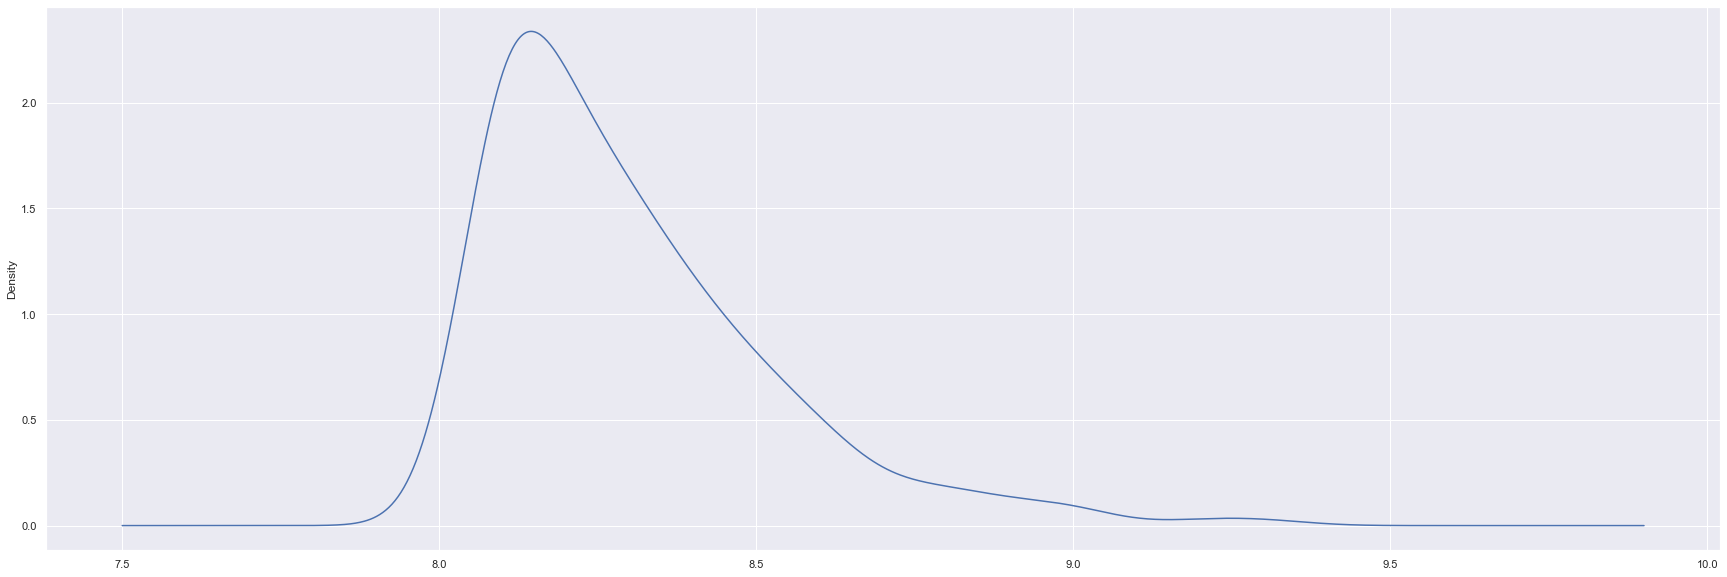

In [41]:
df1['grade'].plot.kde()

<AxesSubplot:ylabel='Density'>

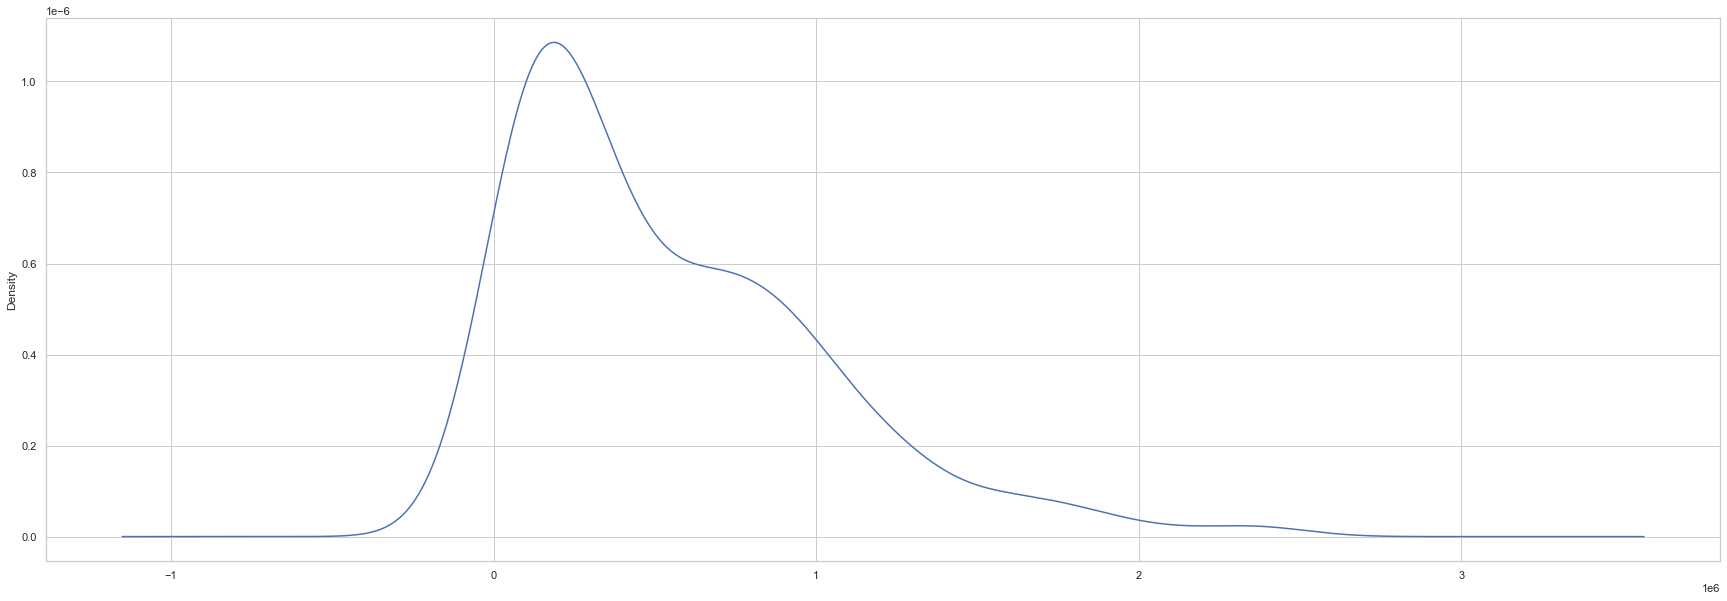

In [83]:
df1['votes'].plot.kde()

<AxesSubplot:title={'center':'grade'}, xlabel='nb_directors'>

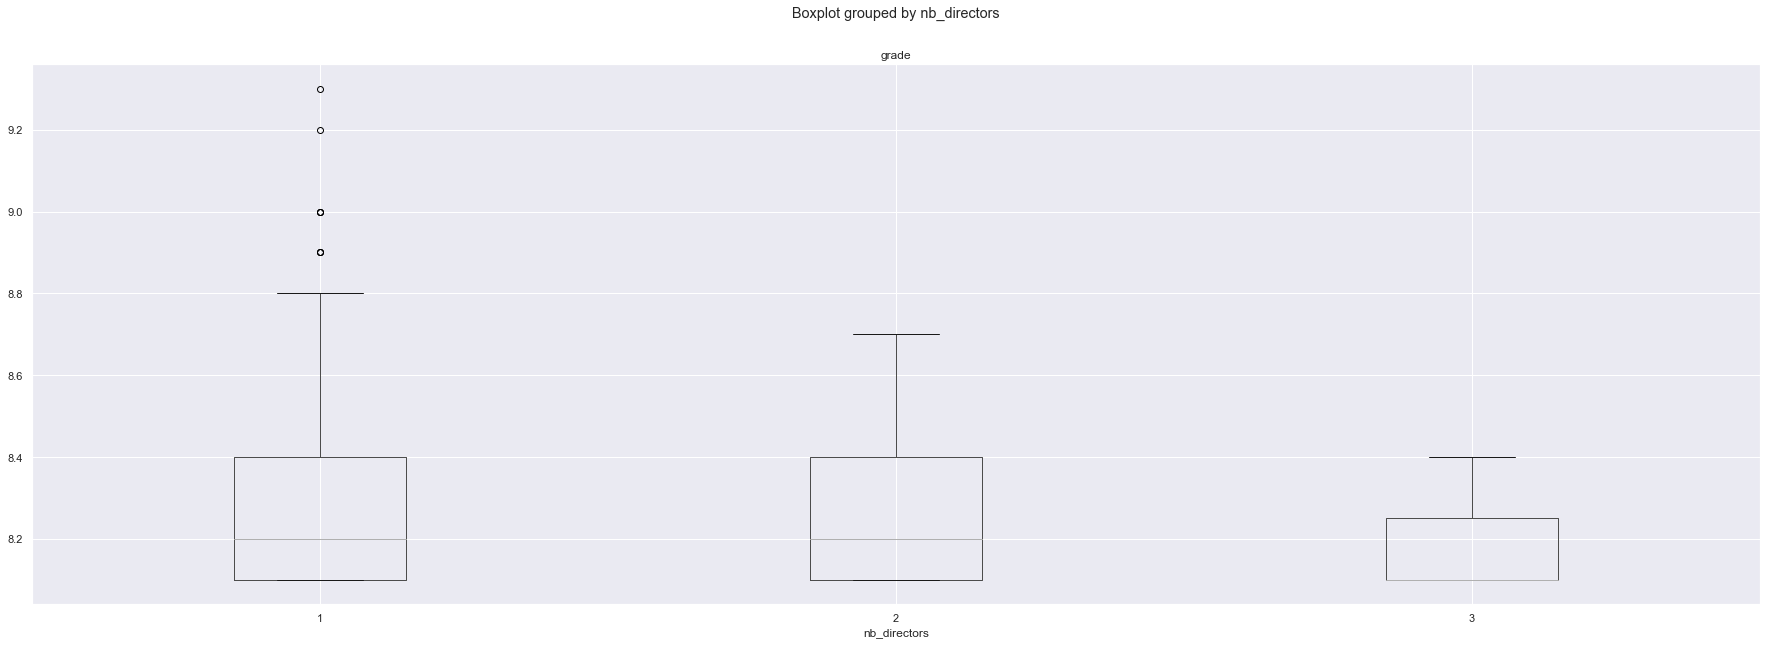

In [42]:
#comparaison des distributions avec un boxplot
df1.boxplot(column='grade',by='nb_directors')

<AxesSubplot:title={'center':'grade'}, xlabel='nb_genres'>

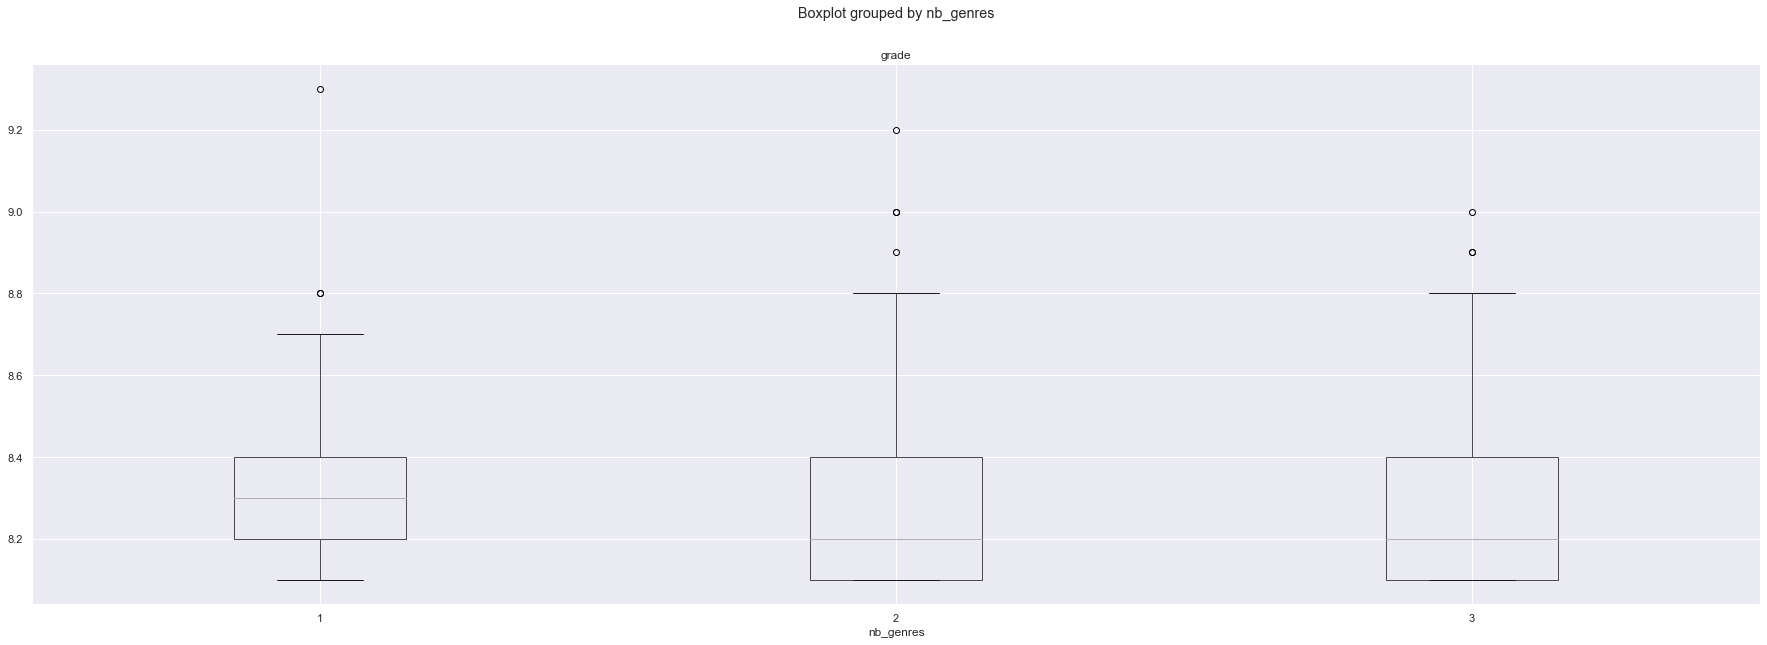

In [43]:
#comparaison des distributions avec un boxplot
df1.boxplot(column='grade',by='nb_genres')

In [104]:
#top_votes = df1.groupby(['titles','votes']).votes.agg([len]).sort_values(by ='votes', ascending = False)
top_votes = df1[['titles','votes','grade','genre1','director1']].sort_values(by ='votes', ascending = False)

In [105]:
top_votes

,titles,votes,grade,genre1,director1
0,Les Évadés,2386826,9.3,Drama,Frank Darabont
2,The Dark Knight : Le Chevalier noir,2349913,9.0,Action,Christopher Nolan
8,Inception,2108327,8.8,Action,Christopher Nolan
9,Fight Club,1888061,8.8,Drama,David Fincher
6,Pulp Fiction,1858789,8.9,Crime,Quentin Tarantino
...,...,...,...,...,...
107,Anand,31487,8.3,Drama,Hrishikesh Mukherjee
170,Jeux dangereux,31387,8.2,Comedy,Ernst Lubitsch
240,Du rififi chez les hommes,30346,8.1,Crime,Jules Dassin
154,Sonate d'automne,28643,8.2,Drama,Ingmar Bergman


In [106]:
top_10_votes = top_votes[:10]

top_10_votes

,titles,votes,grade,genre1,director1
0,Les Évadés,2386826,9.3,Drama,Frank Darabont
2,The Dark Knight : Le Chevalier noir,2349913,9.0,Action,Christopher Nolan
8,Inception,2108327,8.8,Action,Christopher Nolan
9,Fight Club,1888061,8.8,Drama,David Fincher
6,Pulp Fiction,1858789,8.9,Crime,Quentin Tarantino
11,Forrest Gump,1846683,8.8,Drama,Robert Zemeckis
14,Matrix,1706705,8.7,Action,Lana Wachowski
10,Le Seigneur des anneaux : La Communauté de l'a...,1689948,8.8,Action,Peter Jackson
5,Le Seigneur des anneaux : Le Retour du roi,1669275,8.9,Action,Peter Jackson
1,Le parrain,1654238,9.2,Crime,Francis Ford Coppola


In [55]:
len(top_10_votes)

10

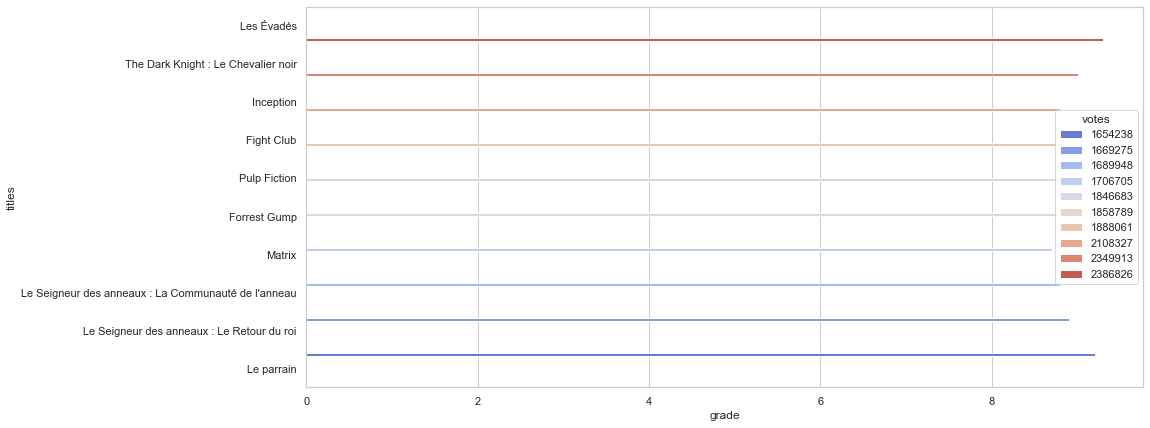

In [82]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='grade', y="titles", data=top_10_votes, hue="votes", palette='coolwarm')

In [107]:
top_50_votes = top_votes[:50]
top_50_votes

,titles,votes,grade,genre1,director1
0,Les Évadés,2386826,9.3,Drama,Frank Darabont
2,The Dark Knight : Le Chevalier noir,2349913,9.0,Action,Christopher Nolan
8,Inception,2108327,8.8,Action,Christopher Nolan
9,Fight Club,1888061,8.8,Drama,David Fincher
6,Pulp Fiction,1858789,8.9,Crime,Quentin Tarantino
11,Forrest Gump,1846683,8.8,Drama,Robert Zemeckis
14,Matrix,1706705,8.7,Action,Lana Wachowski
10,Le Seigneur des anneaux : La Communauté de l'a...,1689948,8.8,Action,Peter Jackson
5,Le Seigneur des anneaux : Le Retour du roi,1669275,8.9,Action,Peter Jackson
1,Le parrain,1654238,9.2,Crime,Francis Ford Coppola


In [108]:
top_20_votes = top_50_votes[:20]

<AxesSubplot:xlabel='genre1', ylabel='count'>

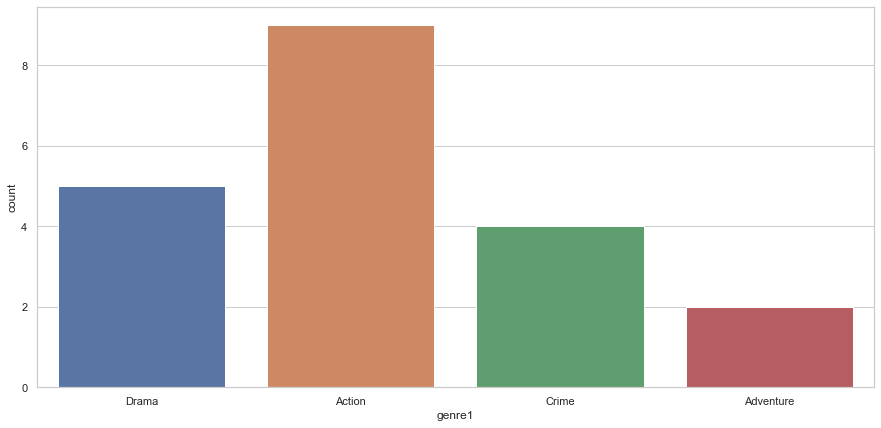

In [102]:
plt.figure(figsize=(15,7))
sns.countplot(data=top_20_votes, x='genre1')

<AxesSubplot:xlabel='genre1', ylabel='count'>

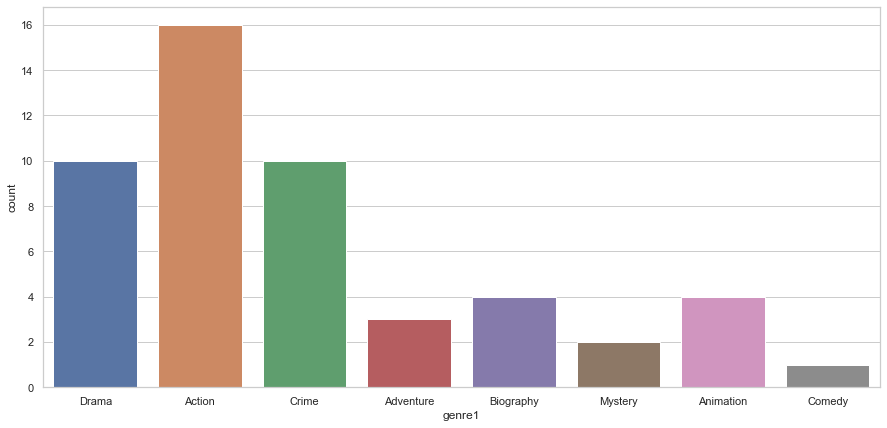

In [103]:
plt.figure(figsize=(15,7))
sns.countplot(data=top_50_votes, x='genre1')

<AxesSubplot:xlabel='count', ylabel='director1'>

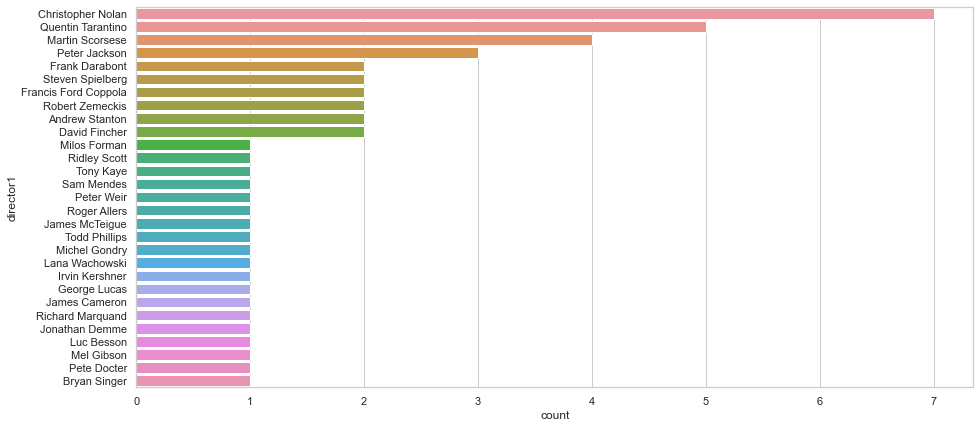

In [121]:
plt.figure(figsize=(15,7))
sns.countplot(data=top_50_votes, order=top_50_votes['director1'].value_counts().index , y='director1')

In [ ]:
# Analyse des tops votes:

In [ ]:
#